<a href="https://colab.research.google.com/github/Maropro3/GraphAnalysisPracticalWork/blob/main/ImportantCharacters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Maropro3/GraphAnalysisPracticalWork/main/Characters.csv")
df.head().T

,0,1,2,3,4
Id,4770051,4769112,4769357,4769119,4769205
Label,VADER,LUKE,THREEPIO,HAN,RIEEKAN
timeset,NaN,NaN,NaN,NaN,NaN
movie_id,777,777,777,777,777
Eccentricity,4,4,3,3,4
closnesscentrality,1.83333,1.83333,1.75,1.77778,2.38889
betweenesscentrality,225.321,223.476,145.869,103.202,99
Degree,12,14,15,14,5
componentnumber,0,0,0,0,0
modularity_class,3,4,0,0,0


In [ ]:
data = df.drop(columns=['Id','Label','timeset','movie_id','Eccentricity','componentnumber','modularity_class', 'Main'])
target = df['Main']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=1) 

In [ ]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [ ]:
L = []

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
for i in range(len(fs.scores_)):
    L.append(fs.scores_[i])

In [ ]:
d = {'attribute': data.columns, 'score': L}
d = pd.DataFrame(data=d)

Text(0.5, 1.0, 'Mutual information Regression')

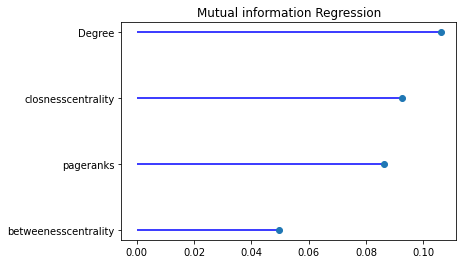

In [ ]:
ordered_X = d.sort_values(by='score')
my_range=range(1,len(d.index)+1)
 
plt.hlines(y=my_range, xmin=0, xmax=ordered_X['score'], color='b')
plt.plot(ordered_X['score'], my_range, "o")
plt.yticks(my_range,ordered_X['attribute'])
plt.title("Mutual information Regression")